In [1]:
import random
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def randomquicksort(alist,times):
   comp = [0]
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   times.append(comp[0])

In [3]:
def randomquicksorthelper(alist,first,last,comp):
   if first<last:

       r = randompartition(alist,first,last)
       splitpoint = r[0]
       tmp = comp.pop()
       comp.append(tmp+r[1])
    
       randomquicksorthelper(alist,first,splitpoint-1,comp)
       randomquicksorthelper(alist,splitpoint+1,last,comp)

In [4]:
def randompartition(alist,first,last):
  
   indxpiv = random.randint(first,last)
   temp = alist[indxpiv]
   alist[indxpiv] = alist[first]
   alist[first] = temp

   compspart = 0
   
   #Partición dos dedos
   '''pivotvalue = alist[first]
   compspart = 0

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
           compspart = compspart + 1
       compspart = compspart + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
           compspart = compspart + 1
       compspart = compspart + 1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark,compspart'''


   #Partición cuatro dedos
   pivot = alist[first]
   i = first
    
   for j in xrange(first + 1, last + 1):
      compspart += 1
      if alist[j] <= pivot:
         i += 1
         aux = alist[i]
         alist[i] = alist[j]
         alist[j] = aux
            
   
   aux = alist[first]
   alist[first] = alist[i]
   alist[i] = aux
    
   return i, compspart

In [5]:
def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
     # Run quicksort for each permutation
    tlist =[]
    for p in range(1,runs+1):
          y = list(x)
          randomquicksort(y,tlist)
          
        
    plt.hist(tlist)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()

    print "n",n
    print "runs",runs
    print "mean",statistics.mean(tlist)
    print "stdev",statistics.stdev(tlist)
    print "min",min(tlist)
    print "max",max(tlist)

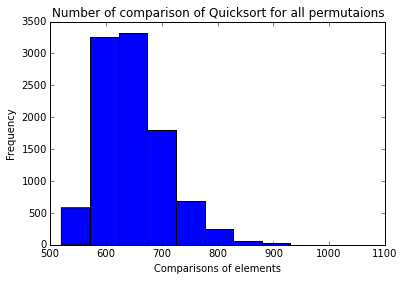

n 100
runs 10000
mean 647.7062
stdev 59.3560459901
min 520
max 1033


In [6]:
randomquicksorttimedistrib(100,10000)